<a href="https://colab.research.google.com/github/KatrinaAgni/2025_VisiKomputer_TI2A/blob/main/JOBSHEET_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


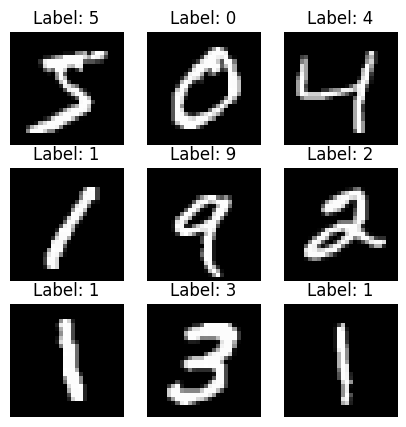

In [2]:
#Praktikum D1 - Memulai Klasifikasi Gambar dengan Dataset Sederhana
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

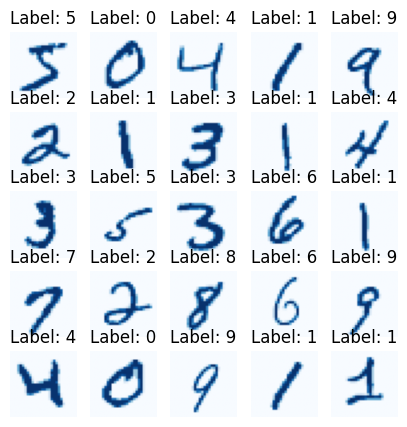

In [3]:
#Tugas kecil -> menampilkan 25 hasil
plt.figure(figsize=(5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i], cmap='Blues')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

In [5]:
#Praktikum D2 - Klasifikasi Gambar dengan Model Machine Learning Tradisional
from sklearn import svm
from sklearn.metrics import accuracy_score

#Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) #gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


In [ ]:
#Tugas kecil -> linear ke rbf
#SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) #gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.8919 - loss: 0.3584 - val_accuracy: 0.9775 - val_loss: 0.0809
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9797 - loss: 0.0656 - val_accuracy: 0.9840 - val_loss: 0.0595
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9869 - loss: 0.0433 - val_accuracy: 0.9870 - val_loss: 0.0549
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9915 - loss: 0.0291 - val_accuracy: 0.9865 - val_loss: 0.0560
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9882 - val_loss: 0.0523


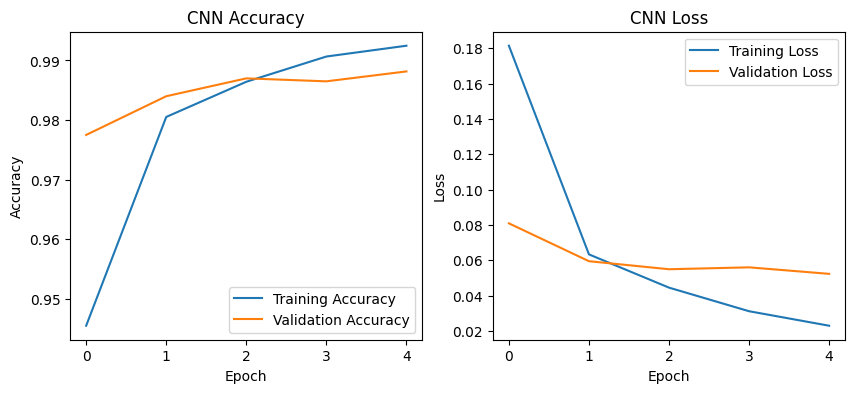

In [4]:
#Praktikum D3 - Membangun CNN Sederhana
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) /255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  	layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.9090 - loss: 0.2939 - val_accuracy: 0.9853 - val_loss: 0.0493
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9868 - loss: 0.0442 - val_accuracy: 0.9847 - val_loss: 0.0526
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9911 - loss: 0.0294 - val_accuracy: 0.9865 - val_loss: 0.0527
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9873 - val_loss: 0.0444
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.9950 - loss: 0.0153 - val_accuracy: 0.9900 - val_loss: 0.0399


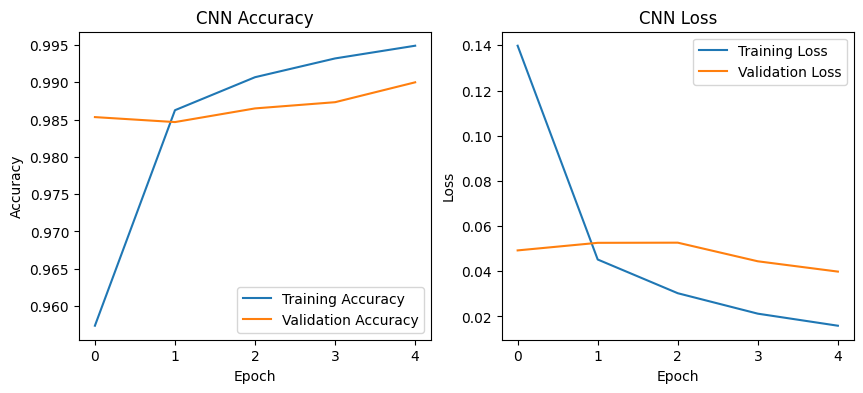

In [17]:
#Praktikum D3 - Membangun CNN Sederhana
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) /255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  	layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 41ms/step - accuracy: 0.3876 - loss: 1.6813 - val_accuracy: 0.5778 - val_loss: 1.2082
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6014 - loss: 1.1330 - val_accuracy: 0.6458 - val_loss: 1.0284
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.6564 - loss: 0.9777 - val_accuracy: 0.6494 - val_loss: 1.0041
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.6917 - loss: 0.8831 - val_accuracy: 0.7014 - val_loss: 0.8866
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7224 - loss: 0.7954 - val_accuracy: 0.6956 - val_loss: 0.9047
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7409 - loss: 0.7326 - val_accuracy: 0.6972 - val_loss: 0.9029
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.7688 - loss: 0.6647 - val_accuracy: 0.6932 - val_loss: 0.9019
Epoch 8/10
1407/1407 ━━

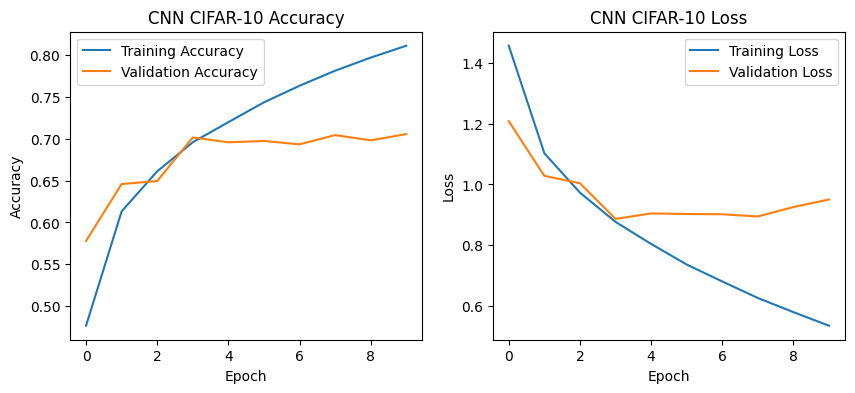

In [19]:
#Praktikum D4 - Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  	layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.2617 - loss: 1.9689 - val_accuracy: 0.4888 - val_loss: 1.4191
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.4378 - loss: 1.5307 - val_accuracy: 0.5444 - val_loss: 1.2962
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.4924 - loss: 1.4013 - val_accuracy: 0.5822 - val_loss: 1.1863
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 40ms/step - accuracy: 0.5224 - loss: 1.3173 - val_accuracy: 0.6134 - val_loss: 1.1127
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.5460 - loss: 1.2645 - val_accuracy: 0.6354 - val_loss: 1.0634
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 41ms/step - accuracy: 0.5639 - loss: 1.2207 - val_accuracy: 0.6438 - val_loss: 1.0225
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 56s 39ms/step - accuracy: 0.5790 - loss: 1.1753 - val_accuracy: 0.6508 - val_loss: 1.0274
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5858 -

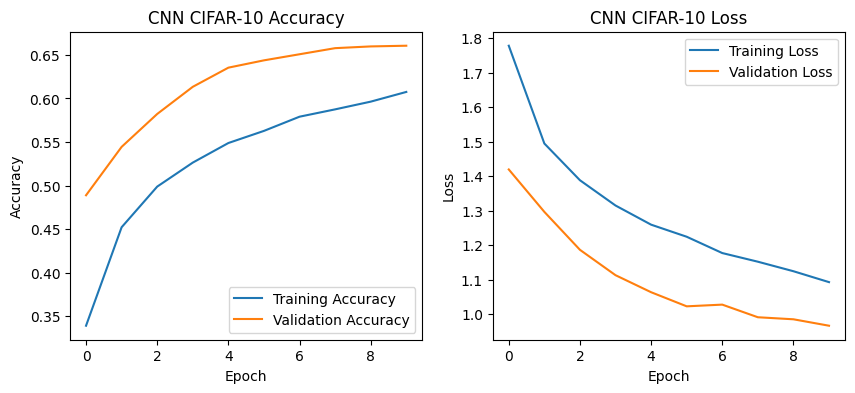

In [20]:
#Praktikum D4 - Tugas Kecil
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  	layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 572s 406ms/step - accuracy: 0.4597 - loss: 1.5569 - val_accuracy: 0.5654 - val_loss: 1.2244
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 626s 409ms/step - accuracy: 0.5745 - loss: 1.2210 - val_accuracy: 0.5764 - val_loss: 1.2082
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 618s 406ms/step - accuracy: 0.5952 - loss: 1.1583 - val_accuracy: 0.5888 - val_loss: 1.1621
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 623s 407ms/step - accuracy: 0.6147 - loss: 1.1054 - val_accuracy: 0.5996 - val_loss: 1.1371
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 630s 413ms/step - accuracy: 0.6271 - loss: 1.0706 - val_accuracy: 0.6126 - val_loss: 1.1168


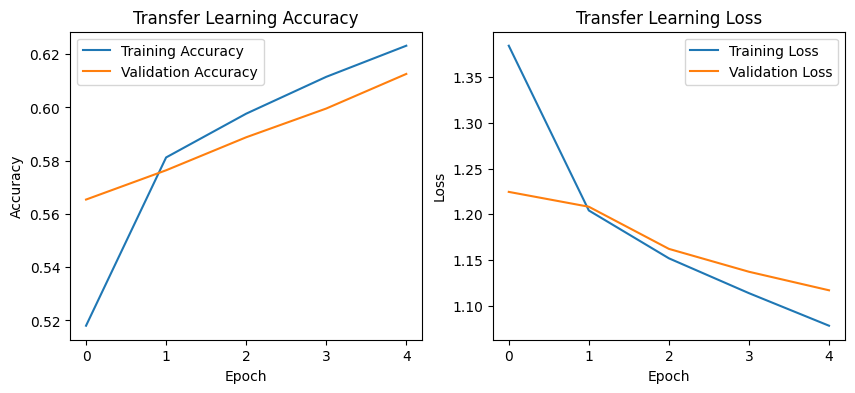

In [21]:
#Praktikum D5 - Transfer Learning dengan Model Pra-Latih
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 665s 471ms/step - accuracy: 0.5086 - loss: 1.4142 - val_accuracy: 0.6198 - val_loss: 1.0693
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 660s 455ms/step - accuracy: 0.6333 - loss: 1.0452 - val_accuracy: 0.6468 - val_loss: 1.0079
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 671s 447ms/step - accuracy: 0.6570 - loss: 0.9715 - val_accuracy: 0.6332 - val_loss: 1.0456
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 711s 468ms/step - accuracy: 0.6736 - loss: 0.9253 - val_accuracy: 0.6504 - val_loss: 0.9846
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 659s 468ms/step - accuracy: 0.6884 - loss: 0.8780 - val_accuracy: 0.6740 - val_loss: 0.9497


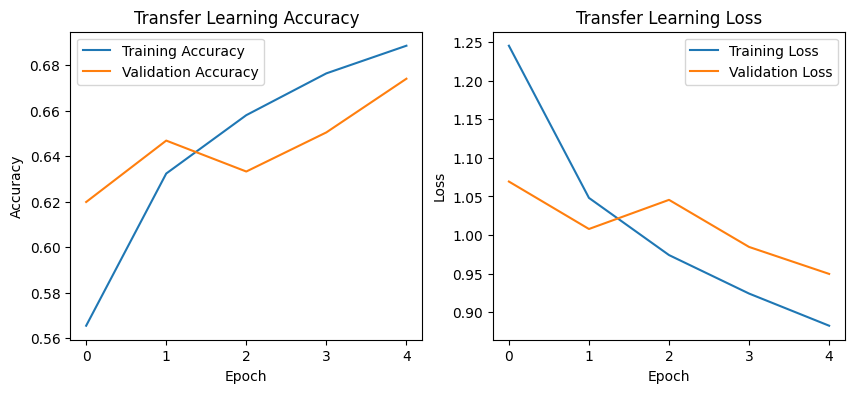

In [24]:
#Praktikum D5 - Tugas Kecil
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = True
for layer in base_model.layers[:-2]: #mengaktifkan 2 lapisan terakhir dari base_model
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.84      0.79      0.81      1000
           2       0.63      0.49      0.55      1000
           3       0.48      0.53      0.50      1000
           4       0.64      0.60      0.62      1000
           5       0.58      0.57      0.58      1000
           6       0.79      0.73      0.76      1000
           7       0.70      0.79      0.74      1000
           8       0.76      0.81      0.78      1000
           9       0.75      0.81      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



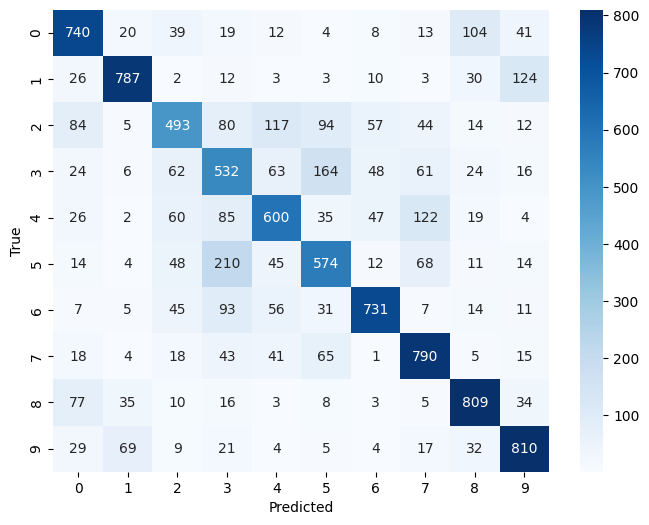

In [ ]:
#Praktikum D6 - Evaluasi COnfusion Matrix dan Metrik Lain
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
#D2
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

#Flatten
x_train_flat = x_train_mnist.reshape(len(x_train_mnist), -1) / 255.0
x_test_flat = x_test_mnist.reshape(len(x_test_mnist), -1) / 255.0

#SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train_mnist[:5000])
y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test_mnist, y_pred))

Akurasi: 0.9101


In [38]:
#Penugasan - Mencoba klasifikasi tulisan angka
# 1) upload file foto tulisan angka
from google.colab import files
uploaded = files.upload() # pilih 1 atau lebih file gambar(jpg/png)

#2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam)
import numpy as np
from PIL import Image, ImageChops, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  img = img_pil.convert('L')
  img = ImageChops.invert(img)
  arr = np.array(img).astype(np.uint8)

  canvas = Image.new('L', (28, 28), color=0) # Initialize canvas
  processed_arr = None # Initialize processed_arr

  if arr.mean() > 127:
    # img = ImageOps.invert(Image.fromarray(arr)) # Corrected: Invert the PIL Image
    img = ImageOps.invert(img)
    arr = np.array(img)

    thr = np.mean(arr) * 0.8
    mask = arr > thr
    if mask.any():
      ys, xs = np.where(mask)
      y_0, y_1 = ys.min(), ys.max()
      x_0, x_1 = xs.min(), xs.max()
      img = img.crop((x_0, y_0, x_1+1, y_1+1))

      img.thumbnail((20,20), Image.Resampling.LANCZOS)
      w, h = img.size

      canvas.paste(img, ((28 - w)//2, (28-h)//2))

      processed_arr = np.array(canvas).astype('float32') / 255.0
      processed_arr = processed_arr[..., None]

  if processed_arr is None:
      processed_arr = np.array(canvas).astype('float32') / 255.0
      processed_arr = processed_arr[..., None]

  return canvas, processed_arr

Saving 4.jpg to 4.jpg


In [39]:
from sklearn.metrics import accuracy_score

results = []
for fname in uploaded.keys():
  img_pil = Image.open(fname)
  _, x = preprocess_to_mnist_28x28(img_pil)
  x_flat = x.reshape(1, -1)

  pred = int(clf.predict(x_flat)[0])
  conf = None
  try:
    if hasattr(clf, "predict_proba"):
      conf = float(np.max(clf.predict_proba(x_flat)))
  except AttributeError:
    pass

  results.append((fname, pred, conf))

  print(f"{fname} -> Prediksi SVM: {pred}" + (f"(p={conf:.2f})" if conf is not None else ""))

4.jpg -> Prediksi SVM: 4
